In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
def cargar_datos(ruta_archivo):
    # Carga los datos del archivo CSV
    datos = pd.read_csv(ruta_archivo, delimiter=',')
    return datos
##Se realiza la carga con Pandas ya que numpy no muestra los valores categoricos
if __name__ == "__main__":
    ruta_archivo = 'C:/Users/ENRIF/Desktop/Curso Coding Dojo/practicas_coding_dojo/machine_learning/ejercicios_core/data/house-prices.csv'
    
    df = cargar_datos(ruta_archivo)  

df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


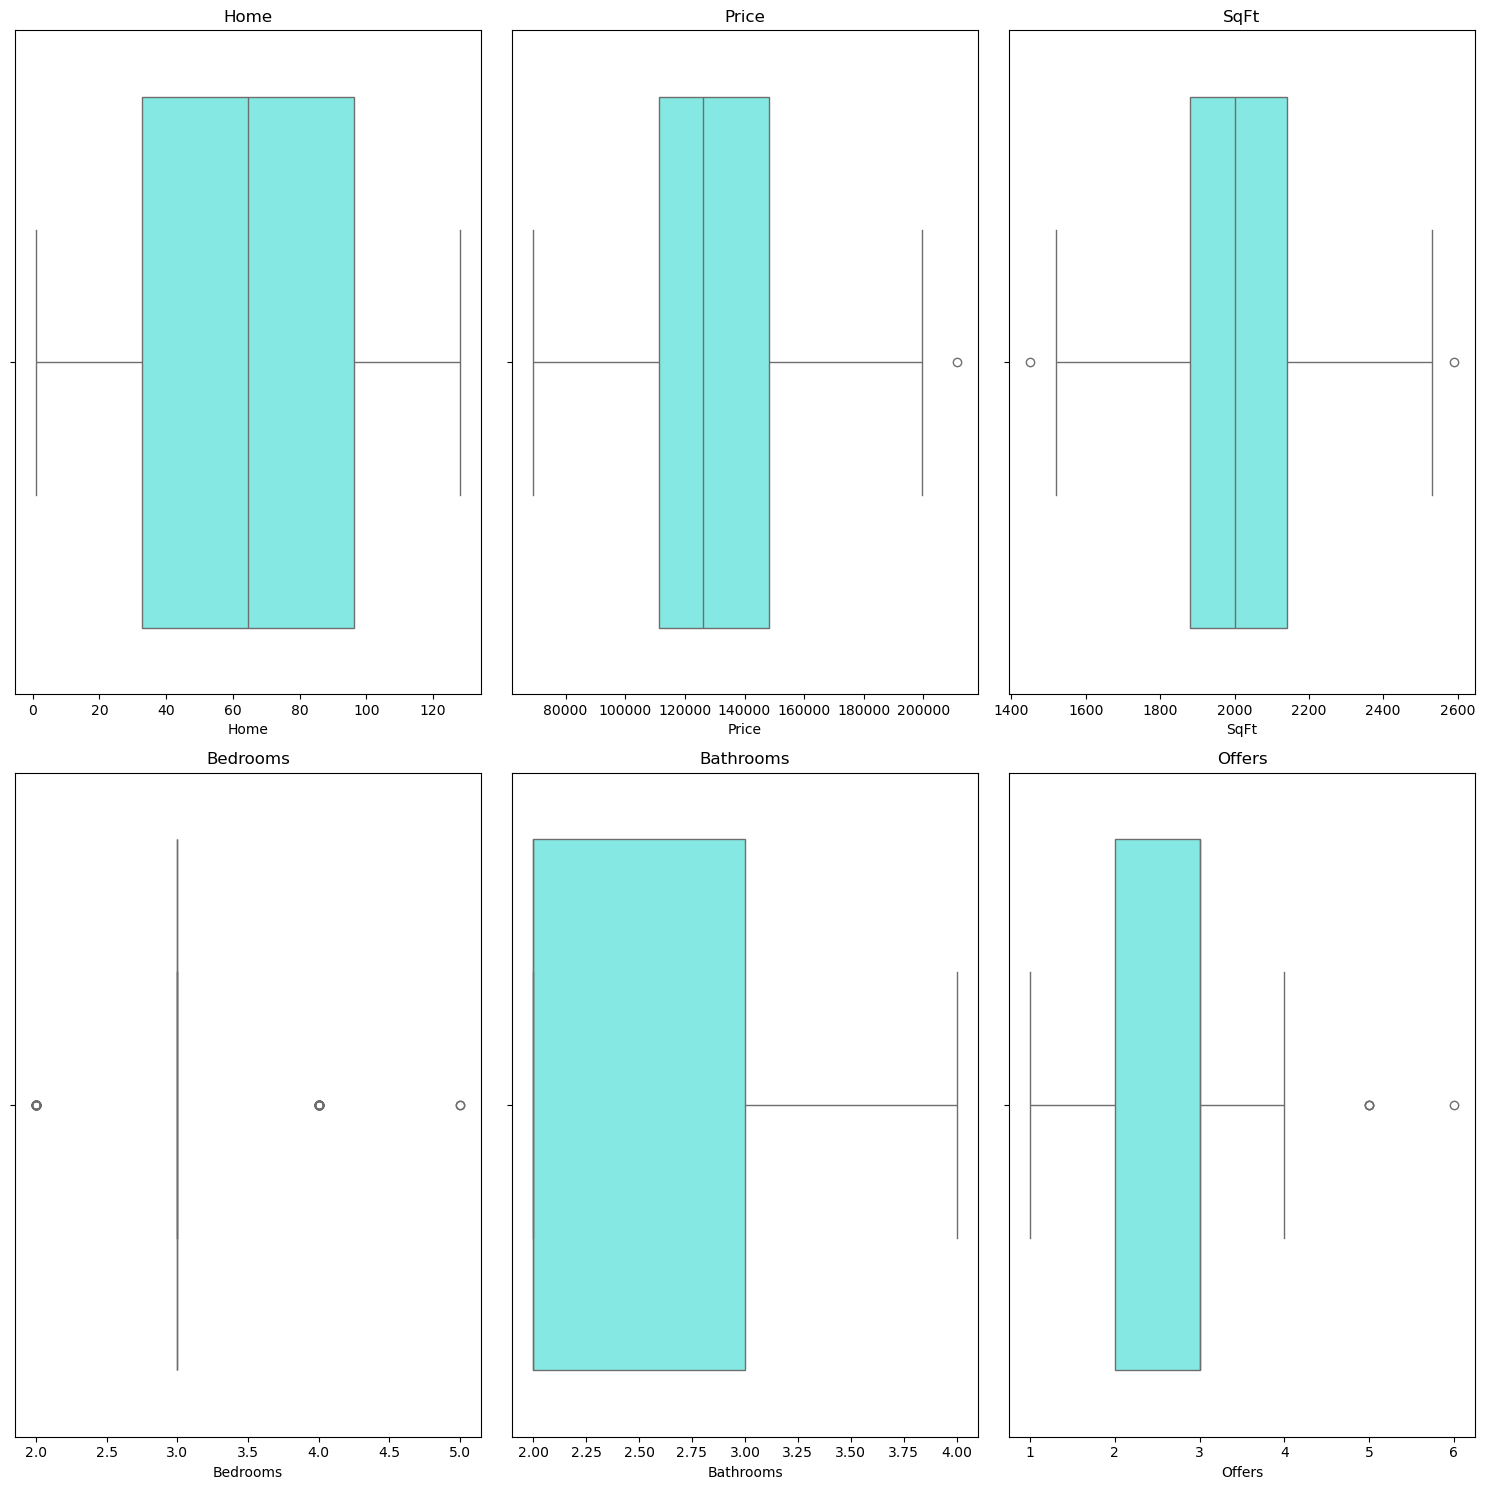

In [ ]:
data_numerico = df.select_dtypes(include=['int64', 'float64'])

def plot_grafico_outliers(features, df):
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

    for i, feature in enumerate(features):
        row, col = divmod(i, 3)  
        sns.boxplot(x=df[feature], ax=axes[row, col], color="#75f8f2")
        axes[row, col].set_title(feature)

    plt.tight_layout()
    plt.show()
plot_grafico_outliers(data_numerico,df)

In [32]:
# Separar variables predictoras y objetivo
X = df.drop(['Price', 'Brick', 'Neighborhood'], axis=1)
y = df['Price']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)


Error Cuadrático Medio: 208270050.20551422
R-cuadrado: 0.6784159232739191


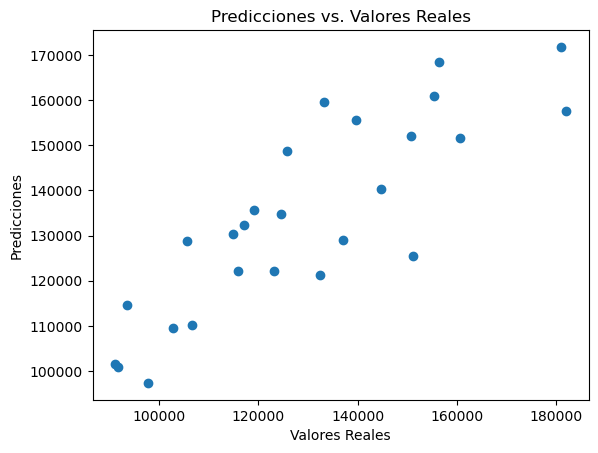

In [34]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')


# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

In [36]:
# Características de la casa para la predicción
nueva_casa = pd.DataFrame({
    'Home': [9500],
    'SqFt': [2000],
    'Bedrooms': [3],
    'Bathrooms': [2],
    'Offers': [4]})

prediccion_precio = modelo.predict(nueva_casa) #predecir resultados

print('El precio de la nueva casa es de:', prediccion_precio) #imprimir predicciones

El precio de la nueva casa es de: [97471.02575961]
